In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris = load_iris()
X, y = iris.data, iris.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_and_evaluate(activation):
    model = keras.Sequential([
        keras.layers.Dense(10, activation=activation, input_shape=(4,)),
        keras.layers.Dense(3, activation="softmax")
    ])
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=50, verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    return acc

activations = ["sigmoid", "relu", keras.layers.LeakyReLU(), "tanh", "softmax"]
results = {}

for act in activations:
    acc = build_and_evaluate(act)
    results[str(act)] = round(acc, 3)

print("Activation Function Comparison (Accuracy on Test Set):")
for act, acc in results.items():
    print(f"{act}: {acc}")


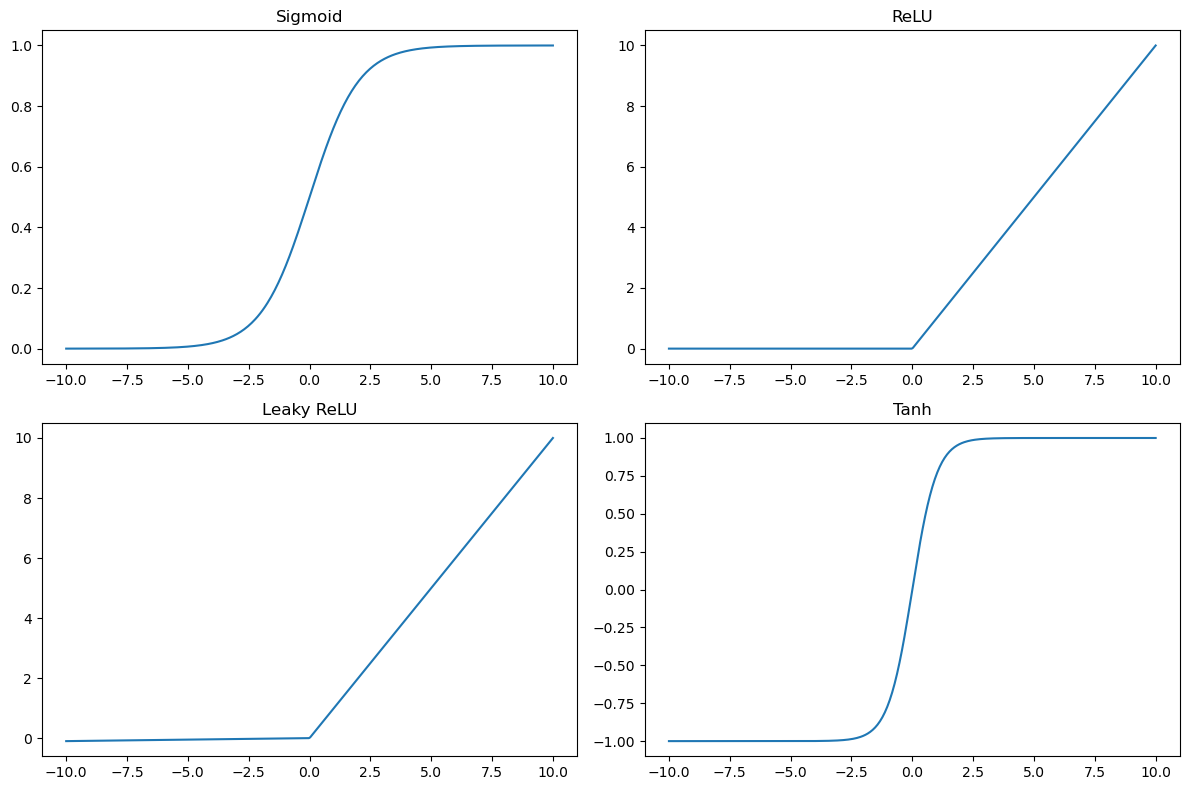

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

x = np.linspace(-10, 10, 400)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")

plt.subplot(2, 2, 2)
plt.plot(x, relu(x))
plt.title("ReLU")

plt.subplot(2, 2, 3)
plt.plot(x, leaky_relu(x))
plt.title("Leaky ReLU")

plt.subplot(2, 2, 4)
plt.plot(x, tanh(x))
plt.title("Tanh")

plt.tight_layout()
plt.show()